# **Análise Exploratória dos Dados (EDA)**


## Configurando o ambiente e fazendo download dos conjuntos de dados



In [0]:
# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link = 'https://drive.google.com/open?id=1gXJhtcrcZ-7jFsRfTZXXFcVBKlRA-5qD' # The shareable link
base_dp = 'https://drive.google.com/open?id=1kf85Br9YVKUCTAFt1XQAWnVgXkyh2qsx'
policiais_mortos_link = 'https://drive.google.com/open?id=1vYPSTopm0MJ53PdF6l_L1iu1R_ghncD5' 
populacao = 'https://drive.google.com/open?id=1LwXhSAKn1iMpxVzp9Rw1lNDmuX-CPDZN'
feminicidio = 'https://drive.google.com/open?id=1JAd-cliUKk_CwVCJ0xk0db0seeMe0Err'
delegacias = 'https://drive.google.com/open?id=12fU3Y_TjyiBRqrlxkRUgmzbvX9Nkbl63'

fluff, id = link.split('=')
fluff, id_2 = base_dp.split('=')
fluff, id_3 = policiais_mortos_link.split('=')
fluff, id_4 = populacao.split('=')
fluff, id_5 = feminicidio.split('=')
fluff, id_6 = delegacias.split('=')

print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('fogo-cruzado.csv') 
downloaded = drive.CreateFile({'id':id_2}) 
downloaded.GetContentFile('BaseDPEvolucaoMensalCisp.csv')
downloaded = drive.CreateFile({'id':id_3}) 
downloaded.GetContentFile('PoliciaisMortos.csv')
downloaded = drive.CreateFile({'id':id_4}) 
downloaded.GetContentFile('PopulacaoEvolucaoMensalCisp.csv')
downloaded = drive.CreateFile({'id':id_5}) 
downloaded.GetContentFile('BaseFeminicidioEvolucaoMensalCisp.csv')
downloaded = drive.CreateFile({'id':id_6}) 
downloaded.GetContentFile('delegacias.csv')

1gXJhtcrcZ-7jFsRfTZXXFcVBKlRA-5qD


## Carregando os dados

**População**

In [10]:
population_df = pd.read_csv('PopulacaoEvolucaoMensalCisp.csv', sep=';', encoding='latin-1')


population_df.shape

(28265, 4)

**Crimes**

In [9]:
crimes_df = pd.read_csv('BaseDPEvolucaoMensalCisp.csv', encoding='latin-1')
crimes_df.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.



(26765, 63)

**Delegacias**

In [6]:
delegacias_df = pd.read_csv('delegacias.csv', sep=';', encoding='latin-1')

# check the shape of the data
delegacias_df.shape

(138, 4)

**Policiais Mortos em Serviço**

In [7]:
policiais_df = pd.read_csv('PoliciaisMortos.csv', sep=';', encoding='latin-1')

# check the shape of the data
delegacias_df.shape

(138, 4)

**Feminicídio**

In [8]:
feminicidio_df = pd.read_csv('BaseFeminicidioEvolucaoMensalCisp.csv', sep=';', encoding='latin-1')

# check the shape of the data
feminicidio_df.shape

(4822, 6)

**Fogo Cruzado**

In [11]:
# reading the dataset

tiroteios_df = pd.read_csv('fogo-cruzado.csv', encoding='latin-1')

# check the shape of the data
tiroteios_df.shape

(23689, 23)

## Correção de erros ou mudança nos dados

Retirando casas decimais do campo de população

In [0]:
population_df['pop_circ'] = population_df['pop_circ'].astype(int) # tirei casas decimais pra facilitar (e não entendi pq teria meia pessoa??)

Verificando nulos no dataset de crimes

In [0]:
# verifying null
crimes_df.isnull().sum()

In [0]:
crimes_df = crimes_df.replace(r'^\s*$', np.nan, regex=True)  #campos com apenas espaços em branco são substituidos por NaN

In [0]:
df = crimes_df.isnull().sum()
# df[df[1]>=1]..

In [0]:
crimes_df = crimes_df.fillna(0) # substitui todos os campos vazios com 0
crimes_df.head()

Retirando espaços em branco a mais nos campos de texto.

In [0]:
crimes_df['munic'] = crimes_df['munic'].str.strip()

In [0]:
crimes_df['Regiao'] = crimes_df['Regiao'].str.strip()

In [0]:
crimes_df = crimes_df.drop('fase', 1)

Separação da data em campos Ano, Mês e Dia do dataset Fogo Cruzado

In [12]:
tiroteios_df['data_ocorrencia'] = pd.to_datetime(tiroteios_df['data_ocorrencia'], errors='coerce', dayfirst=True)
tiroteios_df['year'], tiroteios_df['month'], tiroteios_df['day'] = tiroteios_df['data_ocorrencia'].dt.year, tiroteios_df['data_ocorrencia'].dt.month, tiroteios_df['data_ocorrencia'].dt.day
tiroteios_df.head()

,id_ocorrencia,local_ocorrencia,latitude_ocorrencia,longitude_ocorrencia,data_ocorrencia,hora_ocorrencia,presen_agen_segur_ocorrencia,qtd_morto_civil_ocorrencia,qtd_morto_agen_segur_ocorrencia,qtd_ferido_civil_ocorrencia,qtd_ferido_agen_segur_ocorrencia,fonte_ocorrencia,estado_id,cidade_id,nome_cidade,cod_ibge_cidade,gentilico_cidade,populacao_cidade,area_cidade,densidade_demo_cidade,nome_estado,uf_estado,cod_ibge_estado,year,month,day
0,8758,Maré; Rio de Janeiro - RJ; Brasil,-22.857496,-43.243015,2018-01-09,15:57:00,0,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2018,1,9
1,10431,R. Alice - Laranjeiras; Rio de Janeiro - RJ; B...,-22.935377,-43.194631,2018-01-19,20:54:00,0,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2018,1,19
2,10430,Areia Branca; Belford Roxo - RJ; Brasil,-22.748600,-43.410628,2018-01-19,18:37:00,0,0,0,0,0,0,19,3602,Belford Roxo,3300456,belford-roxense,469332,7782,6.03,Rio de Janeiro,RJ,33,2018,1,19
3,16,Santa Cruz; Rio de Janeiro - RJ; Brasil,-22.919651,-43.684387,2016-07-05,6:02:00,1,0,1,0,0,1,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2016,7,5
4,17,Rua Barão - Praça Seca; Rio de Janeiro - RJ; B...,-22.898642,-43.352360,2016-07-05,13:44:00,1,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2016,7,5


## Análise da população de acordo com os dois datasets

In [0]:
tmp_data = data[['nome_cidade', 'populacao_cidade', 'year']].copy()
tmp_data.drop_duplicates(subset =['nome_cidade', 'year'], inplace = True)

tmp_data.sort_values(['populacao_cidade'], ascending=[False]).head()

,nome_cidade,populacao_cidade,year
0,Rio de Janeiro,6320446,2018
2150,Rio de Janeiro,6320446,2017
3,Rio de Janeiro,6320446,2016
16060,Rio de Janeiro,6320446,2019
10483,São Gonçalo,999728,2019


In [0]:
tmp_data = pop_crimes[['munic', 'pop_circ', 'vano', 'mes']].copy()
tmp_data = tmp_data.groupby(['munic', 'vano', 'mes'], as_index=False).agg({'pop_circ': 'sum'})
tmp_data.drop_duplicates(subset = ['munic', 'vano'], inplace = True)

tmp_data.sort_values(['pop_circ'], ascending=[False]).head()

,munic,vano,mes,pop_circ
11899,Rio de Janeiro,2018,1,6573410
11911,Rio de Janeiro,2019,1,6551100
11887,Rio de Janeiro,2017,1,6523642
11875,Rio de Janeiro,2016,1,6487724
11863,Rio de Janeiro,2015,1,6465146


Pego sempre só o primeiro mês de cada ano, já que não há grandes mudanças de mês em mês.  
Parece ok, a diferença é pouca e se deve ao fato das fontes dos dados serem diferentes e se basearem em estimativas.  
Fogo cruzado pega dados de população do censo 2010 do IBGE.

### Histogramas

###Join dos datasets Base DP e População

In [0]:
crimes_pop = pd.merge(crimes_df, population_df, how="inner", on=['CISP', 'mes', 'vano'])
crimes_pop.shape

(26739, 63)

In [0]:
crimes_pop['per100k_ratio'] = 100000 / crimes_pop['pop_circ'] 
crimes_pop.head()

,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,pop_circ,per100k_ratio
0,1,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0,0,0,0,1,40,0,1,15,14,0,5,1,26,8,0,0.0,32,0,10,0.0,4,100,12,30,0,37,0.0,90,169,0,1,0,69,1,0,0,0,5,0.0,0.0,0.0,0.0,21,2,0,0,0,0,0,66,5,578,1545,64.724919
1,4,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,0,47,1,4,35,5,0,9,1,25,12,0,1.0,14,1,3,0.0,11,82,9,42,5,23,0.0,36,115,0,1,0,1,35,0,0,0,7,0.0,0.0,0.0,0.0,15,6,0,1,0,0,3,51,9,441,29790,3.356831
2,5,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,1,73,2,1,19,10,1,11,5,26,4,2,0.0,34,2,4,0.0,24,123,28,42,2,47,0.0,97,216,0,0,0,37,4,0,0,0,10,0.0,0.0,0.0,0.0,47,2,1,0,0,0,3,64,11,637,35656,2.804577
3,6,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,6,0,0,0,2,43,2,1,20,10,0,27,6,14,22,0,0.0,20,0,6,0.0,38,143,17,4,0,8,0.0,61,90,0,0,0,8,20,0,0,0,77,0.0,0.0,0.0,0.0,26,2,1,0,0,0,6,56,27,473,76271,1.311114
4,7,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,4,0,0,0,2,18,2,0,2,0,2,23,1,4,0,0,0.0,1,0,1,0.0,23,55,12,1,0,1,0.0,21,35,0,0,0,4,3,0,0,0,9,0.0,0.0,0.0,0.0,10,1,3,0,0,0,4,5,23,147,38659,2.586720


Dados normalizados por 100k habitantes

In [0]:
cols = crimes_pop.columns[9:-2]
# cols
data_per100k = crimes_pop.copy()
data_per100k[cols].astype(float)
data_per100k['posse_drogas'] = pd.to_numeric(data_per100k['posse_drogas'], errors='coerce')
data_per100k['trafico_drogas']  = pd.to_numeric(data_per100k['trafico_drogas'], errors='coerce')
data_per100k['apreensao_drogas_sem_autor']  = pd.to_numeric(data_per100k['apreensao_drogas_sem_autor'], errors='coerce')

for c in cols:
    data_per100k[c] = data_per100k[c] * data_per100k['per100k_ratio']
    
data_per100k.head(5)

,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,pop_circ,per100k_ratio
0,1,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0.000000,0.0,0.0,0.0,64.724919,2588.996764,0.000000,64.724919,970.873786,906.148867,0.000000,323.624595,64.724919,1682.847896,517.799353,0.000000,0.000000,2071.197411,0.000000,647.249191,0.0,258.899676,6472.491909,776.699029,1941.747573,0.000000,2394.822006,0.0,5825.242718,10938.511327,0.0,64.724919,0.0,4466.019417,64.724919,0.0,0.0,0.0,323.624595,0.0,0.0,0.0,0.0,1359.223301,129.449838,0.000000,0.000000,0.0,0.0,0.000000,4271.844660,323.624595,37411.003236,1545,64.724919
1,4,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,10.070493,0.0,0.0,0.0,0.000000,157.771064,3.356831,13.427325,117.489090,16.784156,0.000000,30.211480,3.356831,83.920779,40.281974,0.000000,3.356831,46.995636,3.356831,10.070493,0.0,36.925143,275.260154,30.211480,140.986908,16.784156,77.207116,0.0,120.845921,386.035582,0.0,3.356831,0.0,3.356831,117.489090,0.0,0.0,0.0,23.497818,0.0,0.0,0.0,0.0,50.352467,20.140987,0.000000,3.356831,0.0,0.0,10.070493,171.198389,30.211480,1480.362538,29790,3.356831
2,5,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,8.413731,0.0,0.0,0.0,2.804577,204.734126,5.609154,2.804577,53.286964,28.045771,2.804577,30.850348,14.022885,72.919004,11.218308,5.609154,0.000000,95.355620,5.609154,11.218308,0.0,67.309850,344.962980,78.528158,117.792237,5.609154,131.815122,0.0,272.043976,605.788647,0.0,0.000000,0.0,103.769352,11.218308,0.0,0.0,0.0,28.045771,0.0,0.0,0.0,0.0,131.815122,5.609154,2.804577,0.000000,0.0,0.0,8.413731,179.492932,30.850348,1786.515593,35656,2.804577
3,6,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,7.866686,0.0,0.0,0.0,2.622229,56.377916,2.622229,1.311114,26.222286,13.111143,0.000000,35.400087,7.866686,18.355600,28.844515,0.000000,0.000000,26.222286,0.000000,7.866686,0.0,49.822344,187.489347,22.288943,5.244457,0.000000,10.488915,0.0,79.977973,118.000288,0.0,0.000000,0.0,10.488915,26.222286,0.0,0.0,0.0,100.955802,0.0,0.0,0.0,0.0,34.088972,2.622229,1.311114,0.000000,0.0,0.0,7.866686,73.422402,35.400087,620.157071,76271,1.311114
4,7,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,10.346879,0.0,0.0,0.0,5.173440,46.560956,5.173440,0.000000,5.173440,0.000000,5.173440,59.494555,2.586720,10.346879,0.000000,0.000000,0.000000,2.586720,0.000000,2.586720,0.0,59.494555,142.269588,31.040637,2.586720,0.000000,2.586720,0.0,54.321115,90.535192,0.0,0.000000,0.0,10.346879,7.760159,0.0,0.0,0.0,23.280478,0.0,0.0,0.0,0.0,25.867198,2.586720,7.760159,0.000000,0.0,0.0,10.346879,12.933599,59.494555,380.247808,38659,2.586720


In [0]:
tmp_data = crimes_df.groupby(['munic'], as_index=False)[crimes_df.columns[9:]].sum()
tmp_data['total_crime']= tmp_data.iloc[:, 9:].sum(axis=1)
total_crimes_munic = tmp_data
total_crimes_munic = total_crimes_munic.sort_values(['total_crime'], ascending=[False])


In [0]:
tmp_data = data_per100k.groupby(['munic'], as_index=False)[ data_per100k.columns[9:]].sum()
tmp_data['total_crime']= tmp_data.iloc[:, 9:].sum(axis=1)
total_crimes_munic_100k = tmp_data
total_crimes_munic_100k = total_crimes_munic_100k.sort_values(['total_crime'], ascending=[False])


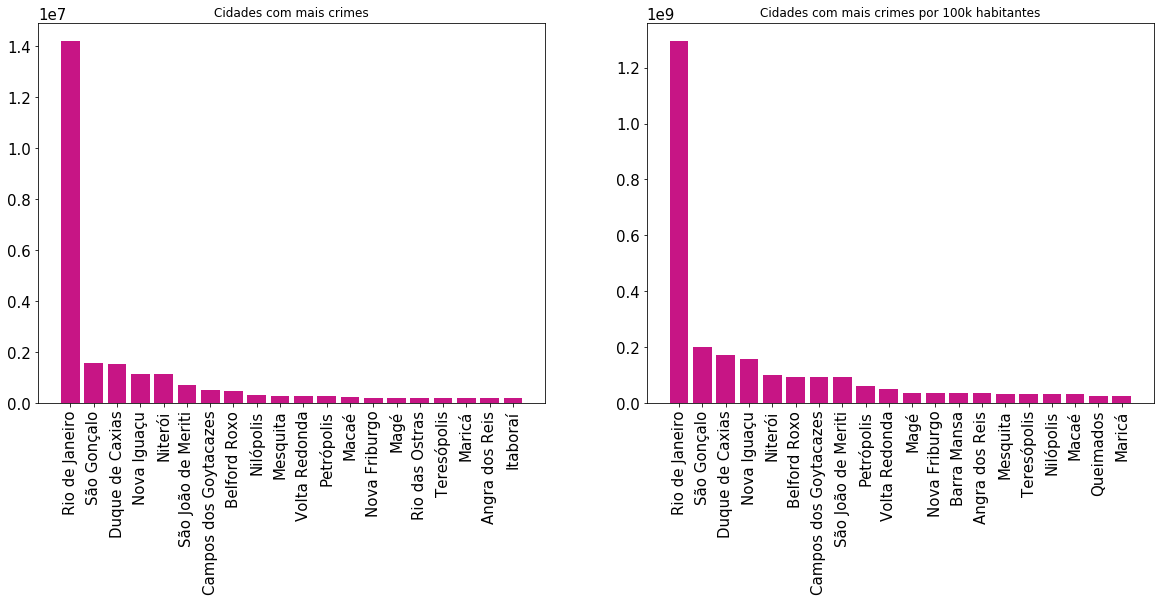

In [0]:
f = plt.figure(figsize=(20,7))

#The below code will create two plots. The parameters that .subplot take are (row, column, no. of plots).
plt.subplot(1,2,1)

y_pos = np.arange(20)

plt.bar(y_pos, total_crimes_munic['total_crime'].head(20), align='center', color = 'mediumvioletred')
plt.xticks(y_pos, total_crimes_munic['munic'].head(20), rotation = 90)
plt.title('Cidades com mais crimes')

plt.subplot(1,2,2)
plt.bar(y_pos, total_crimes_munic_100k['total_crime'].head(20), align='center', color = 'mediumvioletred')
plt.xticks(y_pos, total_crimes_munic_100k['munic'].head(20), rotation = 90)
plt.title('Cidades com mais crimes por 100k habitantes')

plt.show()





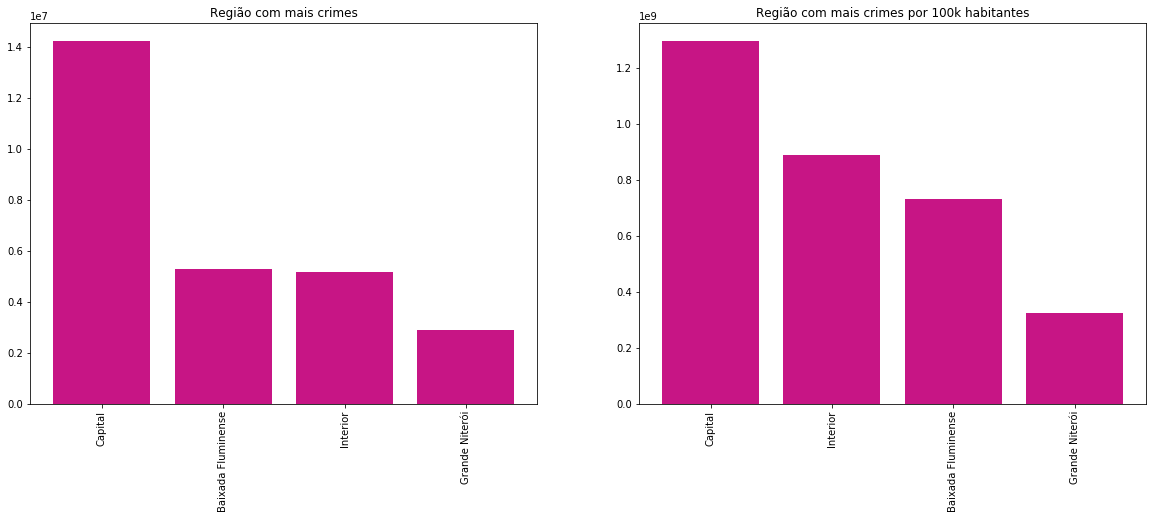

In [0]:

tmp_data = crimes_df.groupby(['Regiao'], as_index=False)[crimes_df.columns[9:]].sum()
tmp_data['total_crime']= tmp_data.iloc[:, 9:].sum(axis=1)
total_crimes_regiao = tmp_data
total_crimes_regiao = total_crimes_regiao.sort_values(['total_crime'], ascending=[False])

tmp_data = data_per100k.groupby(['Regiao'], as_index=False)[data_per100k.columns[9:]].sum()
tmp_data['total_crime']= tmp_data.iloc[:, 9:].sum(axis=1)
total_crimes_regiao_100k = tmp_data
total_crimes_regiao_100k = total_crimes_regiao_100k.sort_values(['total_crime'], ascending=[False])

f = plt.figure(figsize=(20,7))

#The below code will create two plots. The parameters that .subplot take are (row, column, no. of plots).
plt.subplot(1,2,1)

y_pos = np.arange(4)

plt.bar(y_pos, total_crimes_regiao['total_crime'], align='center', color = 'mediumvioletred')
plt.xticks(y_pos,total_crimes_regiao['Regiao'], rotation = 90)
plt.title('Região com mais crimes')

plt.subplot(1,2,2)
plt.bar(y_pos, total_crimes_regiao_100k['total_crime'], align='center', color = 'mediumvioletred')
plt.xticks(y_pos, total_crimes_regiao_100k['Regiao'], rotation = 90)
plt.title('Região com mais crimes por 100k habitantes')

plt.show()

Retirei colunas de texto, total_furtos e total_roubos já que é informação repetida

**apf significa Auto de Prisão em Flagrante**  
**cmp significa Cumprimento de Mandado de Prisão**

Não são necessáriamente crimes, talvez seja melhor tirar para essa análise



In [0]:
delete_columns = ['apf', 'aaapai', 'cmp', 'cmba', 'recuperacao_veiculos', 'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv', 'pol_civis_mortos_serv']
common_crimes = crimes_df.drop(delete_columns, 1).sum(axis = 0, skipna = True)[9:-2].sort_values(ascending=False)[2:]

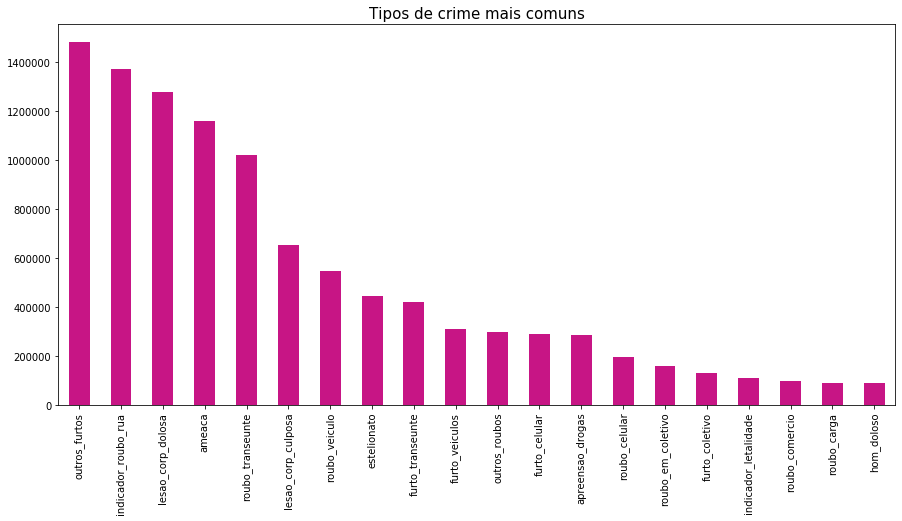

In [0]:
common_crimes[:20].plot.bar(color = 'mediumvioletred', figsize = (15, 7))

plt.title('Tipos de crime mais comuns',fontsize = 15)

plt.xticks(rotation = 90)
plt.show()

Agrupando crimes por Ano e Mês

In [0]:
delete_columns = ['CISP', 'mes_ano', 'AISP', 'RISP', 'munic', 'mcirc', 'apf', 'Regiao','aaapai', 'cmp', 'cmba', 'recuperacao_veiculos', 'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv', 'pol_civis_mortos_serv']

tmp_data = crimes_df.drop(delete_columns, 1)
tmp_data = tmp_data[tmp_data.columns[:-2]]

tmp_data = tmp_data.groupby(['vano', 'mes'], as_index=False)[tmp_data.columns[2:]].sum()
tmp_data['total_crime']= tmp_data.iloc[:, 2:].sum(axis=1)
total_crimes = tmp_data
total_crimes.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,ameaca,indicador_letalidade,indicador_roubo_rua,total_crime
0,2003,1,589,6,20,90,365,6896,245,163,3097,589,172,3236,357,1427,658,5,1.0,966,18,210,0.0,2657,10296,1940,983,49,760,0.0,6751,10483,2,23,0,885,1003,6127,705,3051,64825.0
1,2003,2,583,4,12,111,361,7099,221,188,3207,720,170,3169,443,1532,691,12,0.0,963,20,234,0.0,2680,10634,1732,858,53,648,0.0,7044,10335,3,29,0,802,1159,6047,710,3186,65660.0
2,2003,3,613,5,16,113,332,6968,236,188,2993,640,178,2923,310,1537,683,8,1.0,982,33,189,0.0,2492,9976,1833,943,55,647,0.0,7498,10976,0,30,0,821,1133,5793,747,3202,65094.0
3,2003,4,585,11,14,125,297,6441,215,207,3083,702,169,2966,303,1529,624,10,0.0,1007,37,232,0.0,2643,10222,1694,780,57,540,0.0,7338,10409,3,41,0,819,1061,5626,735,3160,63685.0
4,2003,5,599,6,20,96,381,5843,189,228,3282,712,188,3167,345,1558,663,3,1.0,1072,26,273,0.0,2867,10875,1805,812,57,554,0.0,7186,10414,2,57,0,874,1019,5436,721,3293,64624.0


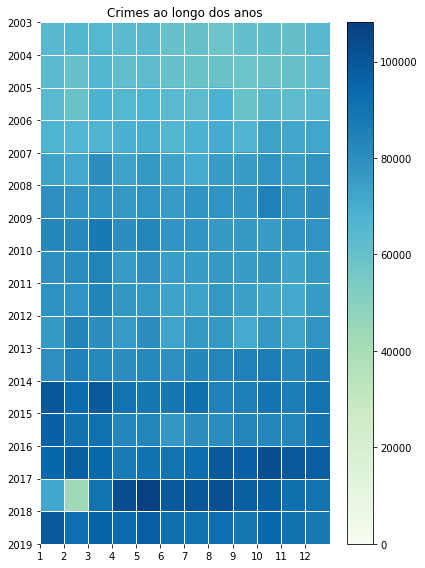

In [0]:
years = total_crimes['vano'].drop_duplicates()
months = total_crimes['mes'].drop_duplicates()

tmp_array = np.array(total_crimes['total_crime'])
tmp_array = np.append(tmp_array, [0,0,0,0])  # faltam 4 meses para 2019, preenchi com 0s
tmp_array = np.array(tmp_array).reshape(17,12)

extent = (0, tmp_array.shape[1], tmp_array.shape[0], 0)

fig, ax = plt.subplots(figsize=(6,8))
im = ax.imshow(tmp_array, aspect='auto', extent=extent, cmap = 'GnBu')

ax = plt.gca()

ax.grid(color='w', linewidth=1)
ax.set_frame_on(False)

ax.set_xticks(np.arange(len(months)))
ax.set_yticks(np.arange(len(years)))

ax.set_xticklabels(months)
ax.set_yticklabels(years)

plt.title("Crimes ao longo dos anos")
plt.colorbar(im)

fig.tight_layout()
plt.show()

**Outlier em Fevereiro de 2017**  
Motivo?

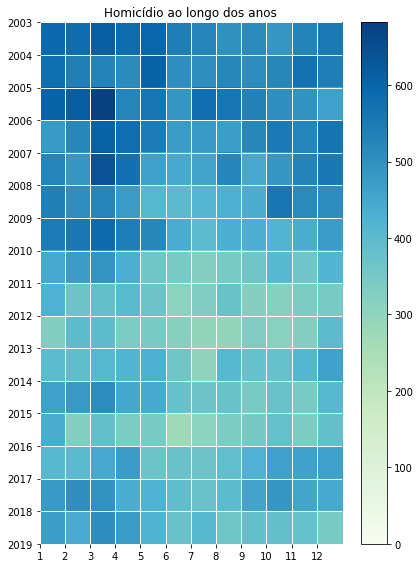

In [0]:
tmp_array = np.array(total_crimes['hom_doloso'])
tmp_array = np.append(tmp_array, [0,0,0,0])  # faltam 4 meses para 2019, preenchi com 0s
tmp_array = np.array(tmp_array).reshape(17,12)

extent = (0, tmp_array.shape[1], tmp_array.shape[0], 0)

fig, ax = plt.subplots(figsize=(6,8))
im = ax.imshow(tmp_array, aspect='auto', extent=extent, cmap = 'GnBu')

ax = plt.gca()

ax.grid(color='w', linewidth=1)
ax.set_frame_on(False)

ax.set_xticks(np.arange(len(months)))
ax.set_yticks(np.arange(len(years)))

ax.set_xticklabels(months)
ax.set_yticklabels(years)

plt.title("Homicídio ao longo dos anos")
plt.colorbar(im)

fig.tight_layout()
plt.show()

**Homicídios dimunindo com o tempo.**
Motivo?

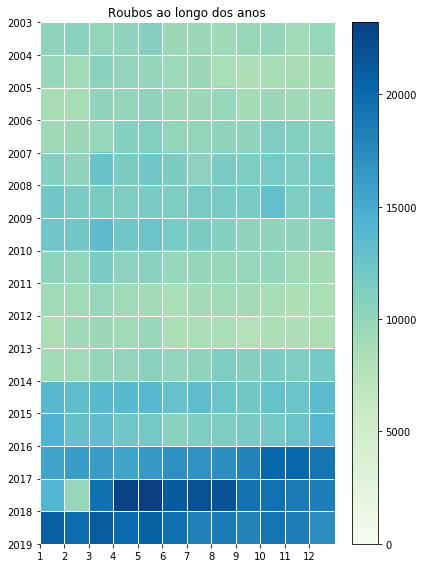

In [0]:
tmp_array = np.array(total_crimes['total_roubos'])
tmp_array = np.append(tmp_array, [0,0,0,0])  # faltam 4 meses para 2019, preenchi com 0s
tmp_array = np.array(tmp_array).reshape(17,12)

extent = (0, tmp_array.shape[1], tmp_array.shape[0], 0)

fig, ax = plt.subplots(figsize=(6,8))
im = ax.imshow(tmp_array, aspect='auto', extent=extent, cmap = 'GnBu')

ax = plt.gca()

ax.grid(color='w', linewidth=1)
ax.set_frame_on(False)

ax.set_xticks(np.arange(len(months)))
ax.set_yticks(np.arange(len(years)))

ax.set_xticklabels(months)
ax.set_yticklabels(years)

plt.title("Roubos ao longo dos anos")
plt.colorbar(im)

fig.tight_layout()
plt.show()

In [14]:
crimes_2019 = crimes_pop.loc[crimes_pop['vano'] == 2019]
crimes_2018 = crimes_pop.loc[crimes_pop['vano'] == 2018]
crimes_2017 = crimes_pop.loc[crimes_pop['vano'] == 2017]
crimes_2016 = crimes_pop.loc[crimes_pop['vano'] == 2016]

NameError: ignored

<Figure size 432x288 with 0 Axes>

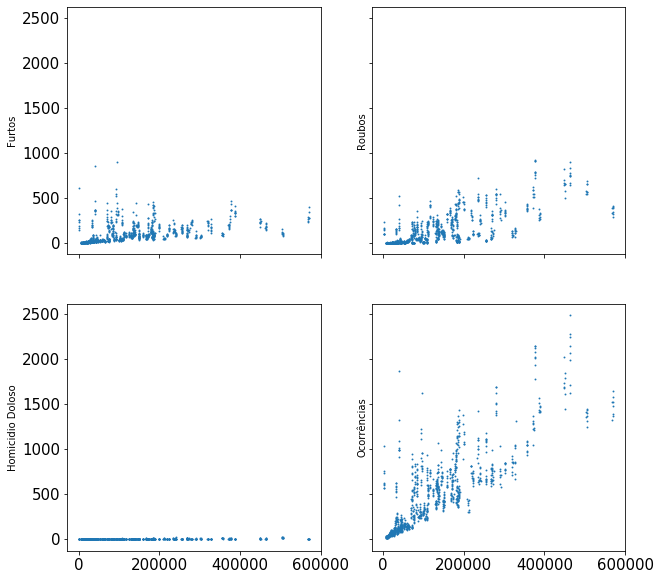

In [0]:
furtos = crimes_2019['total_furtos']
roubos = crimes_2019['total_roubos']
homicidio_dol = crimes_2019['hom_doloso']
ocorrencias = crimes_2019['registro_ocorrencias']
pop = crimes_2019['pop_circ']

f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True, figsize=(10,10))

axes[0][0].scatter(pop, furtos, s= 0.8)
axes[0][0].set_ylabel('Furtos', labelpad = 5)

axes[0][1].scatter(pop, roubos, s= 0.8)
axes[0][1].set_ylabel('Roubos', labelpad = 5)

axes[1][0].scatter(pop, homicidio_dol, s= 0.8)
axes[1][0].set_ylabel('Homicidio Doloso')

axes[1][1].scatter(pop, ocorrencias, s= 0.8)
axes[1][1].set_ylabel('Ocorrências')

plt.show()

Depois seria legal fazer um scatter da soma de todos os crimes por população

## Começando a trabalhar com o dataset de Feminícidio

In [0]:
feminicidio_df.rename(columns={"cisp": "CISP"}, inplace=True)

* base de dados começa em 10/2016 
termina em 08/2019
* não há valores null


In [0]:
feminicidio_df.head()

,CISP,vano,mes,feminicidio,feminicidio_tentativa,FASE
0,1,2016,10,0,0,3
1,4,2016,10,0,0,3
2,5,2016,10,0,0,3
3,6,2016,10,0,1,3
4,7,2016,10,0,0,3


In [0]:
feminicidio_df.isnull().sum()

CISP                     0
vano                     0
mes                      0
feminicidio              0
feminicidio_tentativa    0
FASE                     0
dtype: int64

In [0]:
sum_perano_fem = feminicidio_df.groupby(['vano']).sum()

#### queria plotar esses 2 graficos abaixo juntos

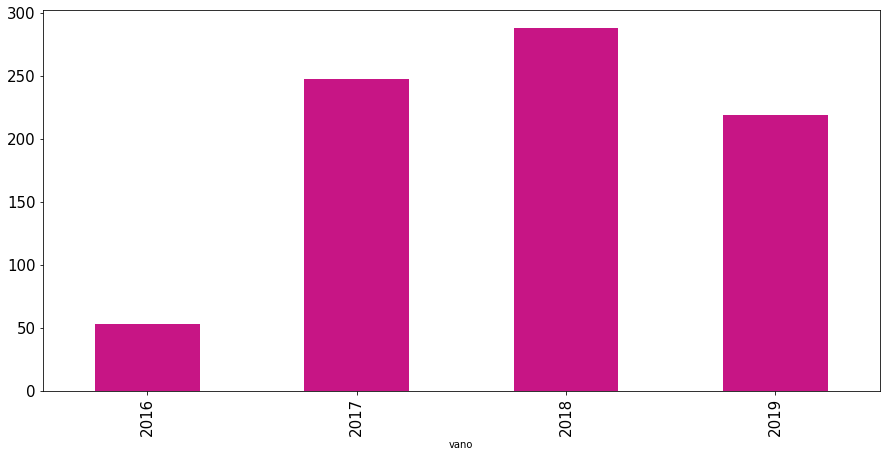

In [0]:
# queria plotar esses 2 graficos abaixo juntos
sum_perano_fem['feminicidio_tentativa'].plot.bar(color = 'mediumvioletred', figsize = (15, 7))

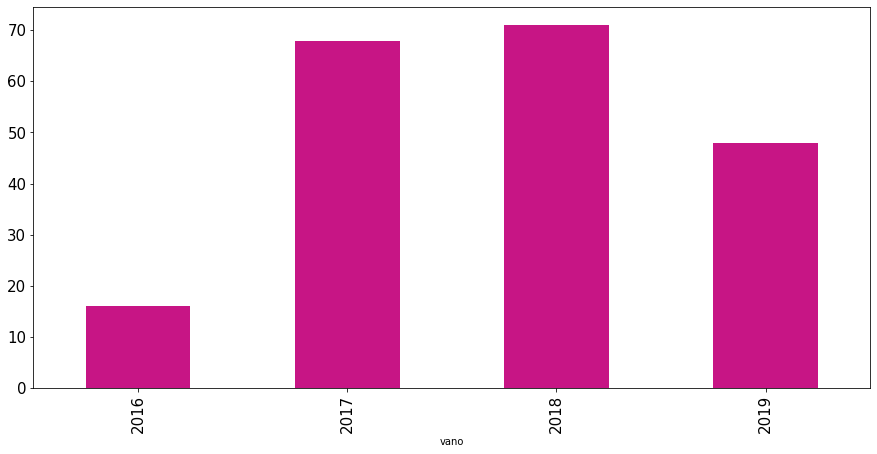

In [0]:
sum_perano_fem['feminicidio'].plot.bar(color = 'mediumvioletred', figsize = (15, 7))

In [0]:
def mode(a):
    u, c = np.unique(a, return_counts=True)
    return u[c.argmax()]

In [0]:
feminicidio_df.groupby(['vano']).apply(mode)

vano
2016    0
2017    0
2018    0
2019    0
dtype: int64

In [0]:
fem_2019 = feminicidio_df.loc[feminicidio_df['vano'] == 2019]
fem_2018 = feminicidio_df.loc[feminicidio_df['vano'] == 2018]
fem_2017 = feminicidio_df.loc[feminicidio_df['vano'] == 2017]
fem_2016 = feminicidio_df.loc[feminicidio_df['vano'] == 2016]

In [0]:
fem_2016.head()

,CISP,vano,mes,feminicidio,feminicidio_tentativa,FASE
0,1,2016,10,0,0,3
1,4,2016,10,0,0,3
2,5,2016,10,0,0,3
3,6,2016,10,0,1,3
4,7,2016,10,0,0,3


#### seria legal plotar um gráfico com 4 barrinhas (ou 2 pq só 2017 e 2018 tao completos) pra ver a evolução de feminicidio por mes por ano pra ver se tem uma tendencia mensal ao longo dos anos

In [0]:
fem_2016.groupby(['mes']).sum()

,CISP,vano,feminicidio,feminicidio_tentativa,FASE
mes,,,,,
10,11246,278208,2,10,414
11,11246,278208,10,22,414
12,11246,278208,4,21,414


In [0]:
fem_2017.groupby(['mes']).sum()

,CISP,vano,feminicidio,feminicidio_tentativa,FASE
mes,,,,,
1,11246,278346,7,25,414
2,11246,278346,7,14,414
3,11246,278346,6,26,414
4,11246,278346,7,28,414
5,11246,278346,3,12,414
6,11246,278346,7,14,414
7,11246,278346,4,18,414
8,11246,278346,5,24,414
9,11246,278346,6,15,414


In [0]:
sum_fem_mes_2018 = fem_2018.groupby(['mes']).sum()

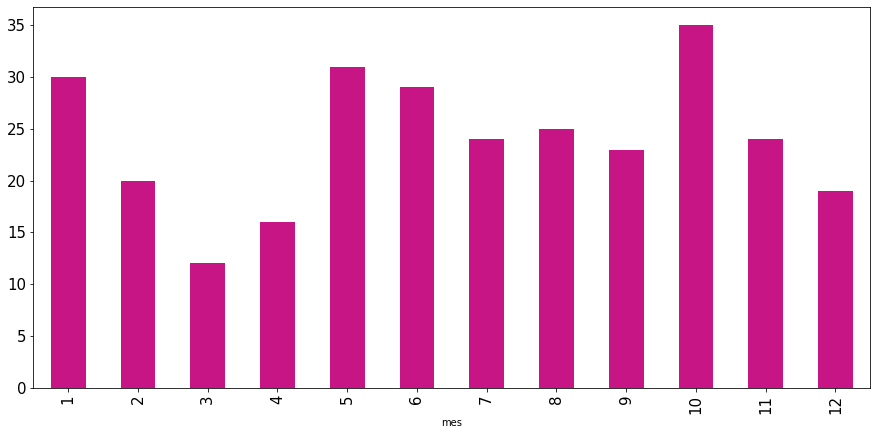

In [0]:
sum_fem_mes_2018['feminicidio_tentativa'].plot.bar(color = 'mediumvioletred', figsize = (15, 7))

In [0]:
sum_fem_mes_2019 = fem_2019.groupby(['mes']).sum()

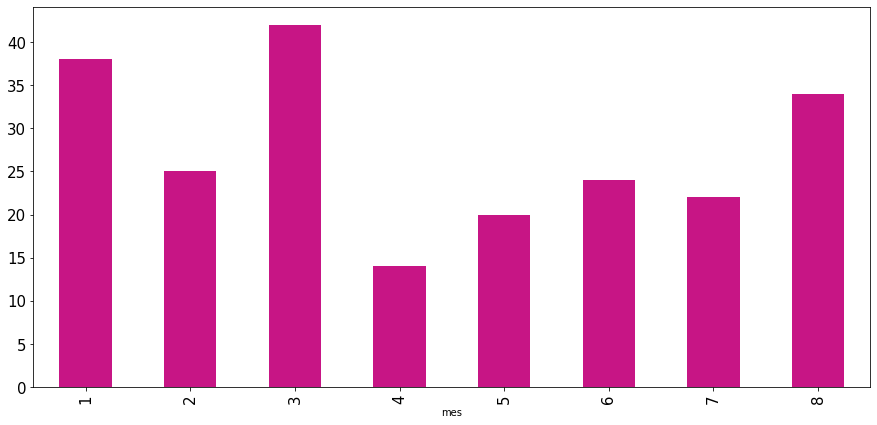

In [0]:
sum_fem_mes_2019['feminicidio_tentativa'].plot.bar(color = 'mediumvioletred', figsize = (15, 7))

### Juntando pop com feminícidio

In [0]:
join_pop_fem = pd.merge(population_df, feminicidio_df, how='inner', on=['CISP','vano', 'mes'])


In [0]:
join_pop_fem.head()

,CISP,mes,vano,pop_circ,feminicidio,feminicidio_tentativa,FASE
0,1,10,2016,1685.217628,0,0,3
1,1,11,2016,1686.288969,0,0,3
2,1,12,2016,1687.360991,0,0,3
3,1,1,2017,1688.433694,0,0,3
4,1,2,2017,1689.507080,0,0,3


### Juntando o anterior (pop x fem) com o de crimes

Isso pra pegar o nome dos munícipios.

mcirc é o código IBGE deles!!!

In [0]:
join_pop_fem_crimes = pd.merge(join_pop_fem, crimes_df, how='inner', on=['CISP', 'mes', 'vano'])
join_pop_fem_crimes.drop(inplace=True, columns=['mes_ano', 'hom_doloso', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular', 'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro', 'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas', 'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor', 'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca', 'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv', 'pol_civis_mortos_serv', 'indicador_letalidade', 'indicador_roubo_rua', 'indicador_roubo_veic', 'registro_ocorrencias'])



In [0]:
join_pop_fem_crimes.head()

,CISP,mes,vano,pop_circ,feminicidio,feminicidio_tentativa,FASE,AISP,RISP,munic,mcirc,Regiao
0,1,10,2016,1685.217628,0,0,3,5,1,Rio de Janeiro,3304557,Capital
1,1,11,2016,1686.288969,0,0,3,5,1,Rio de Janeiro,3304557,Capital
2,1,12,2016,1687.360991,0,0,3,5,1,Rio de Janeiro,3304557,Capital
3,1,1,2017,1688.433694,0,0,3,5,1,Rio de Janeiro,3304557,Capital
4,1,2,2017,1689.507080,0,0,3,5,1,Rio de Janeiro,3304557,Capital


In [0]:
join_pop_fem_crimes['per100k_ratio'] = 100000 / join_pop_fem_crimes['pop_circ'] 
join_pop_fem_crimes.tail()

,CISP,mes,vano,pop_circ,feminicidio,feminicidio_tentativa,FASE,AISP,RISP,munic,mcirc,Regiao,per100k_ratio
4817,168,4,2019,18203.10349,1,0,3,28,5,Rio Claro,3304409,Interior,5.493569
4818,168,5,2019,18213.93763,0,0,3,28,5,Rio Claro,3304409,Interior,5.490301
4819,168,6,2019,18224.77821,0,0,3,28,5,Rio Claro,3304409,Interior,5.487035
4820,168,7,2019,18235.20108,0,0,2,28,5,Rio Claro,3304409,Interior,5.483899
4821,168,8,2019,18246.05432,0,0,2,28,5,Rio Claro,3304409,Interior,5.480637


In [0]:
fcols = join_pop_fem_crimes.columns[4:6]
# cols
fem_per100k = join_pop_fem_crimes.copy()
fem_per100k[fcols].astype(float)
#fem_per100k['posse_drogas'] = pd.to_numeric(data_per100k['posse_drogas'], errors='coerce')
#data_per100k['trafico_drogas']  = pd.to_numeric(data_per100k['trafico_drogas'], errors='coerce')
#data_per100k['apreensao_drogas_sem_autor']  = pd.to_numeric(data_per100k['apreensao_drogas_sem_autor'], errors='coerce')

for c in fcols:
    fem_per100k[c] = fem_per100k[c] * fem_per100k['per100k_ratio']
    
fem_per100k.tail(5)

,CISP,mes,vano,pop_circ,feminicidio,feminicidio_tentativa,FASE,AISP,RISP,munic,mcirc,Regiao,per100k_ratio
4817,168,4,2019,18203.10349,5.493569,0.0,3,28,5,Rio Claro,3304409,Interior,5.493569
4818,168,5,2019,18213.93763,0.000000,0.0,3,28,5,Rio Claro,3304409,Interior,5.490301
4819,168,6,2019,18224.77821,0.000000,0.0,3,28,5,Rio Claro,3304409,Interior,5.487035
4820,168,7,2019,18235.20108,0.000000,0.0,2,28,5,Rio Claro,3304409,Interior,5.483899
4821,168,8,2019,18246.05432,0.000000,0.0,2,28,5,Rio Claro,3304409,Interior,5.480637


In [0]:
sum_fem_100k = fem_per100k.groupby(['munic']).sum()
sum_fem_100k.head()

,CISP,mes,vano,pop_circ,feminicidio,feminicidio_tentativa,FASE,AISP,RISP,mcirc,per100k_ratio
munic,,,,,,,,,,,
Angra dos Reis,5810,225,70620,7.112309e+06,0.499650,10.751203,103,1155,175,115503500,17.238760
Araruama,4130,225,70620,4.601110e+06,3.121685,3.761765,103,875,140,115507315,26.641230
Armação dos Búzios,4445,225,70620,1.189093e+06,0.000000,5.771445,103,875,140,115508155,103.145273
Arraial do Cabo,4620,225,70620,1.043426e+06,6.689538,6.569264,103,875,140,115509030,117.420172
Barra Mansa,3150,225,70620,6.347183e+06,0.550687,11.572289,103,980,175,115514245,19.300124


In [0]:
sum_fem = join_pop_fem_crimes.groupby(['munic']).sum()
sum_fem.head()

,CISP,mes,vano,pop_circ,feminicidio,feminicidio_tentativa,FASE,AISP,RISP,mcirc,per100k_ratio
munic,,,,,,,,,,,
Angra dos Reis,5810,225,70620,7.112309e+06,1,22,103,1155,175,115503500,17.238760
Araruama,4130,225,70620,4.601110e+06,4,5,103,875,140,115507315,26.641230
Armação dos Búzios,4445,225,70620,1.189093e+06,0,2,103,875,140,115508155,103.145273
Arraial do Cabo,4620,225,70620,1.043426e+06,2,2,103,875,140,115509030,117.420172
Barra Mansa,3150,225,70620,6.347183e+06,1,21,103,980,175,115514245,19.300124


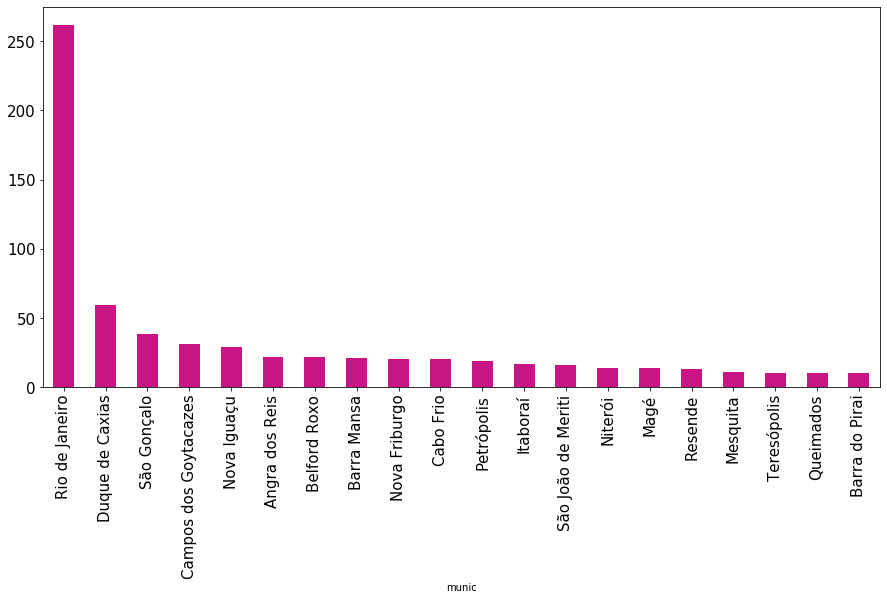

In [0]:
sum_fem['feminicidio_tentativa'].sort_values(ascending=False).nlargest(20).plot.bar(color = 'mediumvioletred', figsize = (15, 7))

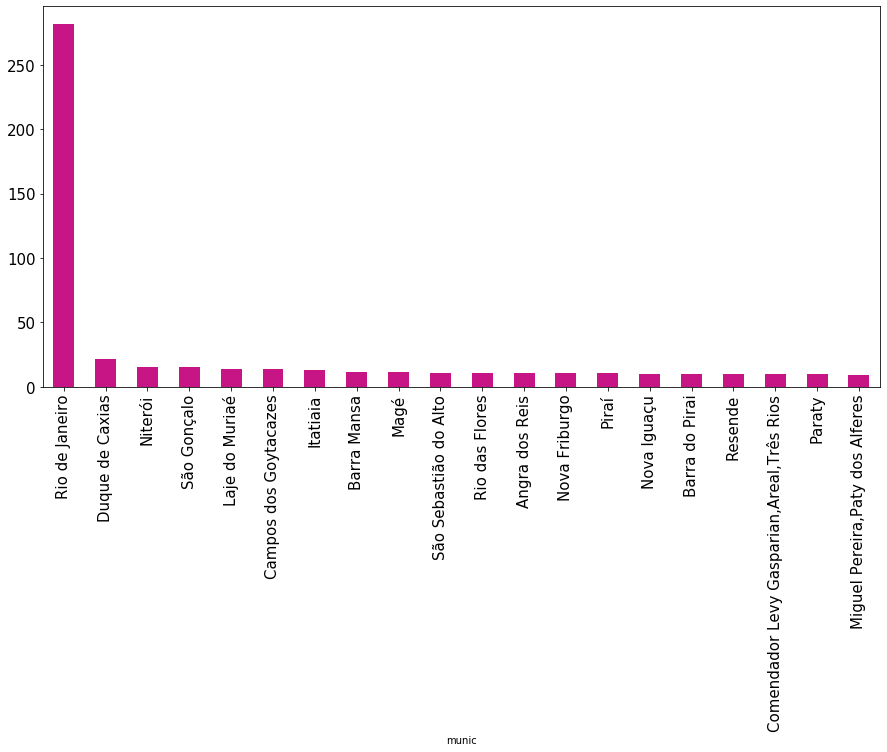

In [0]:
sum_fem_100k['feminicidio_tentativa'].sort_values(ascending=False).nlargest(20).plot.bar(color = 'mediumvioletred', figsize = (15, 7))